### แนวทางการทำ EDA
1. MIN-MAX Date ของข่าวแต่ละหมวด รวมถึงจำนวนข่าวในระยะเวลา 3 เดือนย้อนหลังแยกรายหมวดข่าว
2. ความถี่ของข่าวในแต่ละวัน แยกเส้นรายหมวด (Time series line)
3. ยอด View Min-Max-Avg-Sd
4. ยอด Share Min-Max-Avg-Sd
5. Scatter view vs share
6. Sentiment header และ Content

In [1]:
import time
from datetime import datetime
from datetime import timedelta
import pandas as pd
import json
import pymongo
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["BADS7101"]
q_c_urlList = mydb["URL_LIST_CRIME"]
i_c_scrape = mydb["CRIME_NEWS"]

q_p_urlList = mydb["URL_LIST_POLITIC"]
i_p_scrape = mydb["POLITIC_NEWS_U"]


q_e_urlList = mydb["URL_LIST_ENTER"]
i_e_scrape = mydb["ENTERTAIN_NEWS"]

#### Descriptive data ข่าวอาชญากรรม

In [3]:
cursor_crime = q_c_urlList.find()
cursor_crime_s = i_c_scrape.find()

df_crime_url = pd.DataFrame(cursor_crime)
df_crime_detail = pd.DataFrame(cursor_crime_s)
df_crime_join = pd.merge(df_crime_url,df_crime_detail,how="inner",on=['URL'])
df_crime_join.insert(0,'Category',value='Crime')

In [4]:
print('Min time:',min(df_crime_url.newsdate))
print('Max time',max(df_crime_url.newsdate))

Min time: 2020-05-31 17:11:00
Max time 2020-11-07 16:20:00


In [5]:
df_crime_detail.describe()

,totalView,totalShare,share_fb,share_tw,share_gp
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,10095.208451,38.494836,12.868545,13.628169,11.998122
std,20268.734419,32.240407,11.355648,13.005376,9.715115
min,523.000000,7.000000,2.000000,2.000000,2.000000
25%,3034.000000,25.000000,8.000000,8.000000,8.000000
50%,4842.000000,31.000000,10.000000,11.000000,10.000000
75%,9276.000000,40.000000,14.000000,14.000000,13.000000
max,278285.000000,398.000000,133.000000,163.000000,131.000000


#### Descriptive data ข่าวการเมือง

In [6]:
cursor_pol = q_p_urlList.find()
cursor_pol_s = i_p_scrape.find()

df_pol_url = pd.DataFrame(cursor_pol)
df_pol_detail = pd.DataFrame(cursor_pol_s)
df_pol_join = pd.merge(df_pol_url,df_pol_detail,how="inner",on=['URL'])
df_pol_join.insert(0,'Category',value='Politic')

In [7]:
print('Min time:',min(df_pol_url.newsdate))
print('Max time',max(df_pol_url.newsdate))

Min time: 2020-08-07 14:50:00
Max time 2020-11-07 22:15:00


In [8]:
df_pol_detail.describe()

,totalView,totalShare,share_fb,share_tw,share_gp
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000
mean,3821.031718,23.167582,12.063187,5.652847,5.445554
std,9966.970128,93.557906,91.505933,8.572791,5.513482
min,233.000000,0.000000,0.000000,0.000000,0.000000
25%,1185.000000,10.000000,4.000000,3.000000,3.000000
50%,1656.500000,14.000000,5.000000,4.000000,4.000000
75%,3103.250000,18.000000,7.000000,5.000000,6.000000
max,267321.000000,2140.000000,2120.000000,218.000000,95.000000


#### Descriptive data ข่าวบันเทิง

In [9]:
cursor_ent = q_e_urlList.find()
cursor_ent_s = i_e_scrape.find()

df_ent_url = pd.DataFrame(cursor_ent)
df_ent_detail = pd.DataFrame(cursor_ent_s)
df_ent_join = pd.merge(df_ent_url,df_ent_detail,how="inner",on=['URL'])
df_ent_join.insert(0,'Category',value='Entertain')

In [10]:
print('Min time:',min(df_ent_url.newsdate))
print('Max time',max(df_ent_url.newsdate))

Min time: 2020-03-17 13:30:00
Max time 2020-11-07 18:52:00


In [11]:
df_ent_detail.describe()

,totalView,totalShare,share_fb,share_tw,share_gp
count,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000
mean,16036.824853,58.001957,17.162427,23.22407,17.610568
std,40714.761226,101.758774,25.727439,62.45175,27.919098
min,121.000000,4.000000,1.000000,1.00000,1.000000
25%,3478.000000,28.000000,9.000000,9.00000,8.000000
50%,6622.500000,36.000000,11.000000,13.00000,11.000000
75%,13241.500000,52.000000,16.000000,20.00000,16.000000
max,639069.000000,1760.000000,354.000000,1660.00000,403.000000


### Plot กราฟ

In [12]:
df_plotViz = pd.concat([df_crime_join,df_pol_join,df_ent_join],ignore_index=True)

In [13]:
df_plotViz.insert(6,'newsdate_date',value=None)
df_plotViz['newsdate_date'] = df_plotViz['newsdate'].dt.date

In [14]:
cat_ratio = df_plotViz.groupby(['Category']).agg({'URL': lambda x: len(x)}).reset_index()
cat_ratio

,Category,URL
0,Crime,1065
1,Entertain,1022
2,Politic,4010


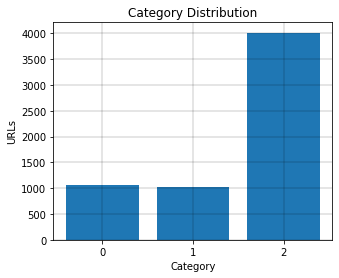

In [15]:
plt.figure(figsize=(5,4))
plt.grid(color='k', linestyle='-', linewidth=0.2)
x=range(3)
plt.bar(x, cat_ratio.URL)
plt.xticks(cat_ratio.index)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('URLs')
plt.show()

In [16]:
# count URLs by day
df_plotLine = df_plotViz.groupby(['newsdate_date','Category']).count()[['URL']]
df_plotLine.reset_index(inplace=True)

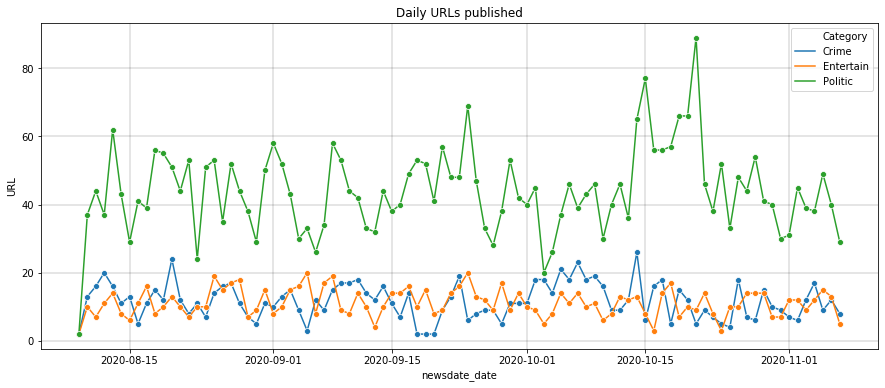

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(color='k', linestyle='-', linewidth=0.2)
sns.lineplot(data=df_plotLine, x="newsdate_date", y="URL",hue="Category", marker="o")
ax.set_title('Daily URLs published')
plt.show()

จากกราฟจะพบว่า ข่าวการเมืองพุ่งสูงขึ้น ตั้งแต่วันที่ 14-19 ตุลาคม63 ซึ่งเป็นช่วงที่มีการชุมนุมต่อเนื่อง จนถึงวันที่ 21 ตุลาคม<br>
ที่มีการชุมนุมใหญ่ที่อนุสาวรีย์ ก่อนเดินขบวนประชิดทำเนียบรัฐบาล ในขณะที่ข่าวอาชญากรรมคงที่

In [18]:
def plotScatter(df):
    fig, ax = plt.subplots(2, 2, figsize=(14, 14))
    sns.color_palette("Paired")
    sns.scatterplot(ax=ax[0,0],data=df, x='totalView', y='totalShare', hue='Category')
    ax[0,0].set_title('Overview')
    ax[0,0].grid(color='k', linestyle='-', linewidth=0.2)
    sns.scatterplot(ax=ax[0,1],data=df, x='totalView', y='share_fb', hue='Category')
    ax[0,1].set_title('Facebook')
    ax[0,1].grid(color='k', linestyle='-', linewidth=0.2)
    sns.scatterplot(ax=ax[1,0],data=df, x='totalView', y='share_tw', hue='Category')
    ax[1,0].set_title('Twitter')
    ax[1,0].grid(color='k', linestyle='-', linewidth=0.2)
    sns.scatterplot(ax=ax[1,1],data=df, x='totalView', y='share_gp', hue='Category')
    ax[1,1].set_title('Google+')
    ax[1,1].grid(color='k', linestyle='-', linewidth=0.2)

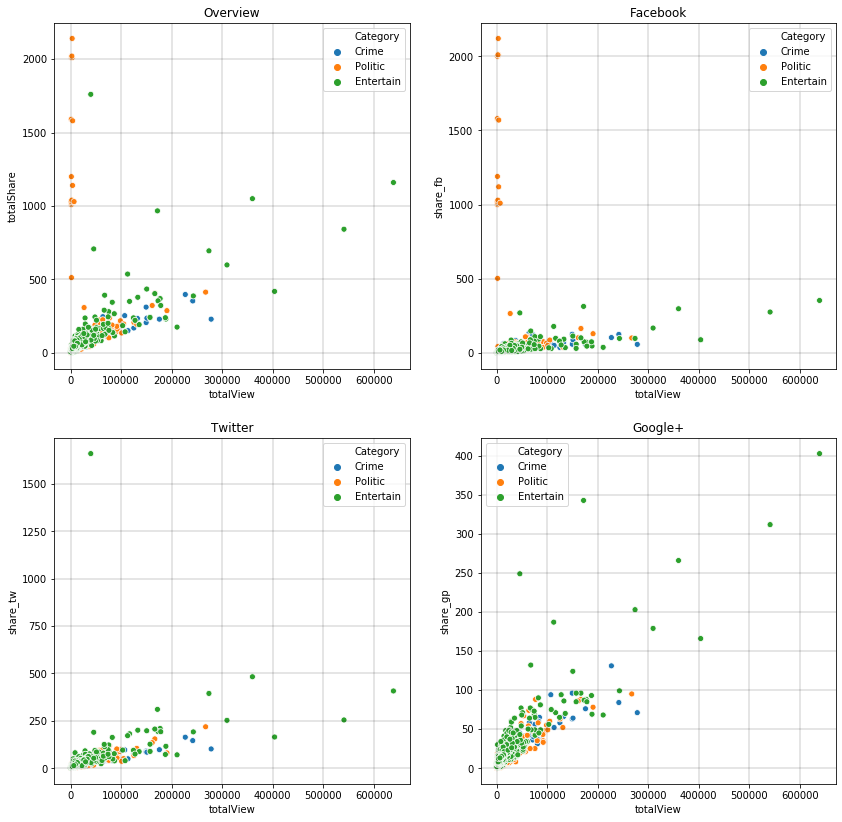

In [19]:
plotScatter(df_plotViz)

Slice เอา totalShare ต่ำกว่า 500

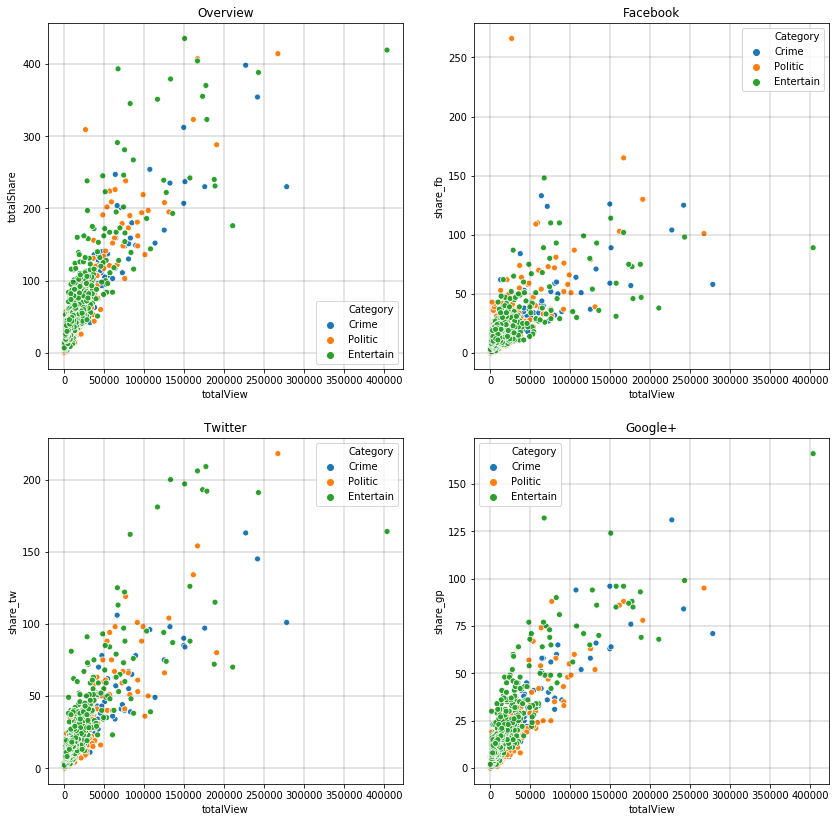

In [20]:
df_scatter = df_plotViz[df_plotViz.totalShare<500]
plotScatter(df_scatter)

Slice เอา totalShare มากกว่า 500

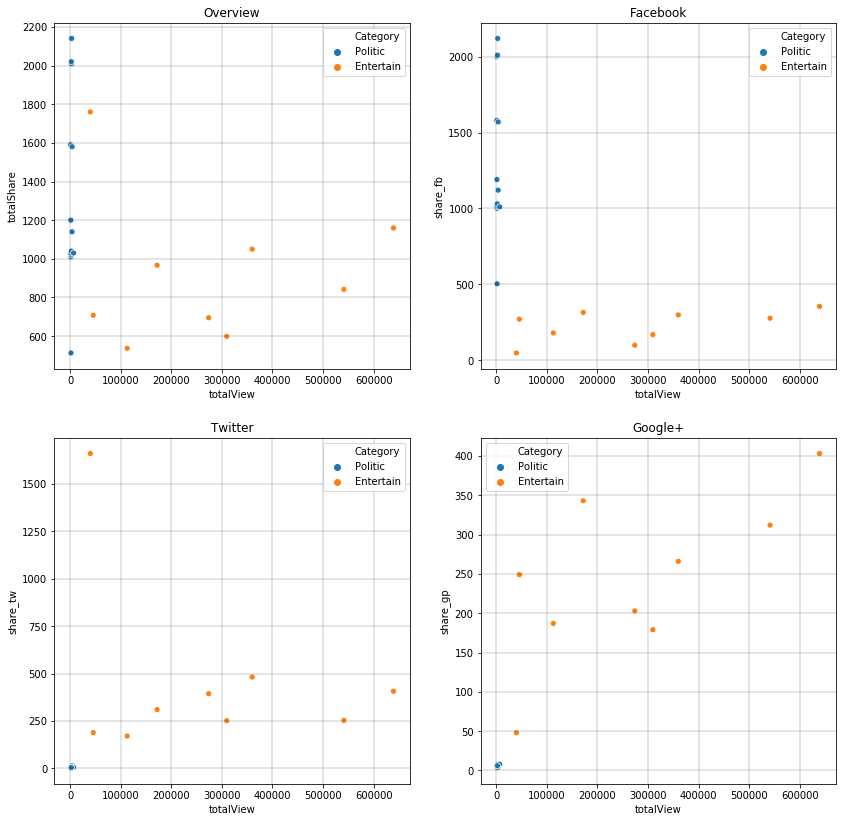

In [21]:
df_scatter = df_plotViz[df_plotViz.totalShare>=500]
plotScatter(df_scatter)

### เช็ค Share > View (เคสไม่ปกติ)

In [22]:
df_plotViz[df_plotViz.totalShare>=df_plotViz.totalView]

,Category,_id_x,timestamp,URL,headline,newsdate,newsdate_date,_id_y,totalView,totalShare,share_fb,share_tw,share_gp,text
1330,Politic,5fa6cc7052e52341a96bec3a,2020-11-07 23:33:43.357,https://www.dailynews.co.th/politics/804372,ปชช.เชื่อมีต่างชาติ-นักการเมืองหนุนหลังม็อบ,2020-11-01 11:18:00,2020-11-01,5fa916a00f49c8ddce633861,1305,1590.0,1580.0,2.0,5,เมื่อวันที่ 1 พ.ย. สำนักวิจัยซูเปอร์โพล นำเสนอ...
3919,Politic,5fa91c5f019e3d90e8937cd8,2020-11-09 17:39:19.639,https://www.dailynews.co.th/politics/793630,'ซูเปอร์โพล'ชี้ปชช.หนุนแก้รธน. ให้รัฐบาลอยู่ไม...,2020-09-05 10:47:00,2020-09-05,5fa98354dd3811252624930e,1737,2010.0,2000.0,4.0,4,เมื่อวันที่ 5 ก.ย. สำนักวิจัยซูเปอร์โพลเปิดเผย...


### Top 10 View

In [23]:
df_plotViz.sort_values(by='totalView',ascending=False).head(10)

,Category,_id_x,timestamp,URL,headline,newsdate,newsdate_date,_id_y,totalView,totalShare,share_fb,share_tw,share_gp,text
5955,Entertain,5fa6d9ea52e52341a96bf66f,2020-11-08 00:31:12.029,https://www.dailynews.co.th/entertainment/791455,ซูมจนเครื่องเออร์เรอร์ 'เมย์-พิชญ์นาฏ'ใส่บิกิน...,2020-08-23 21:17:00,2020-08-23,5faa17dd04b88d22320a8194,639069,1160.0,354.0,407.0,403,ปกติก็เป็นอีกหนึ่งสาวที่สวยและแซ่บจนเป็นที่ยอม...
5973,Entertain,5fa6da0452e52341a96bf681,2020-11-08 00:31:40.278,https://www.dailynews.co.th/entertainment/791145,พริกที่ว่าเผ็ดยังไม่เด็ดเท่าเธอ 'กวาง' อวดหุ่น...,2020-08-21 17:14:00,2020-08-21,5faa18b504b88d22320a81a6,541194,842.0,276.0,254.0,312,ยังหาคำนิยามให้กับความแซ่บของนักแสดงและนางแบบส...
5823,Entertain,5fa6d93652e52341a96bf5eb,2020-11-08 00:28:10.609,https://www.dailynews.co.th/entertainment/793270,"""เจนนี่""ขอโทษหลังแซวแรง ""คนสงขลามีผัวตั้งแต่ป.4""",2020-09-03 08:56:00,2020-09-03,5faa11d604b88d22320a8110,403836,419.0,89.0,164.0,166,เมื่อวันที่ 3 ก.ย. กลายเป็นกระแสดราม่าอีกครั้ง...
5111,Entertain,5fa6d57352e52341a96bf31a,2020-11-08 00:12:10.235,https://www.dailynews.co.th/entertainment/805038,เผ็ดกรุบกริบ!'นนนี่'ลูก'แอน-สิเรียม' นุ่งบิกิน...,2020-11-04 16:51:00,2020-11-04,5fa9eeb604b88d22320a7e48,359960,1050.0,298.0,482.0,266,ยิ่งโตยิ่งสวยของจริง สำหรับสาว นนนี่-นนลนีย์ ล...
5574,Entertain,5fa6d7dc52e52341a96bf4f1,2020-11-08 00:22:25.101,https://www.dailynews.co.th/entertainment/796964,บังเอิญปีเกิดตรงกับฝาหีบศพ บอลเฉลยเลขเด็ด'โรเบ...,2020-09-23 07:56:00,2020-09-23,5faa063404b88d22320a8017,309590,599.0,168.0,252.0,179,"จากกรณีการเสียชีวิตของดาวตลกชื่อดัง ""โรเบิร์ต ..."
1038,Crime,5fa6c69952e52341a96be7e6,2020-11-07 23:08:48.480,https://www.dailynews.co.th/crime/789383,รับสิ้นชีวิตติดหรูจนหนี้ท่วม ใช้'แป๊บ'แทนปืนชิ...,2020-08-11 17:42:00,2020-08-11,5fa83ffbe8687d6eb8729333,278285,230.0,58.0,101.0,71,เมื่อวันที่ 11 ส.ค. จากกรณีคนร้ายแต่งกายมิดชิด...
5818,Entertain,5fa6d93652e52341a96bf5e6,2020-11-08 00:28:10.609,https://www.dailynews.co.th/entertainment/793281,ส่องความแซ่บ'อิงอิง' นักศึกษาคนสนิท'เป๊ก'สามี'...,2020-09-03 09:44:00,2020-09-03,5faa119b04b88d22320a810b,273889,695.0,98.0,394.0,203,กลายเป็นประเด็นร้อนแรง ทำเอาเหล่าคนวงการบันเทิ...
2789,Politic,5fa6d40b52e52341a96bf1ee,2020-11-08 00:06:11.192,https://www.dailynews.co.th/politics/798508,โปรดเกล้าฯถอดยศตำรวจ เรียกคืนเครื่องราชฯ 10 ราย,2020-09-30 22:35:00,2020-09-30,5fa916a00f49c8ddce633e16,267321,414.0,101.0,218.0,95,เมื่อวันที่ 30 ก.ย. ราชกิจจานุเบกษาเผยแพร่ประ...
5361,Entertain,5fa6d6b952e52341a96bf41c,2020-11-08 00:17:34.701,https://www.dailynews.co.th/entertainment/800468,'สินจัย'เปิดใจกดไลค์ 'น้องกัน'ควงหนุ่มคนสนิทเท...,2020-10-11 18:42:00,2020-10-11,5fa9fbd804b88d22320a7f42,243000,388.0,98.0,191.0,99,เมื่อวันที่ 11 ต.ค. เรียกได้ว่าเป็นเรื่องราวดี...
387,Crime,5fa6c35052e52341a96be55b,2020-11-07 22:54:46.976,https://www.dailynews.co.th/crime/799405,'ทนายเดชา'ไม่โกรธถูกทัวร์ลง ขออภัยที่ตัดสินใจผ...,2020-10-06 10:30:00,2020-10-06,5fa821a6e8687d6eb87290a8,241825,354.0,125.0,145.0,84,ยังอยู่ในกระแสความสนใจของประชาชน สำหรับประเด็น...


### Top 10 Share

In [24]:
df_plotViz.sort_values(by='totalShare',ascending=False).head(10)

,Category,_id_x,timestamp,URL,headline,newsdate,newsdate_date,_id_y,totalView,totalShare,share_fb,share_tw,share_gp,text
1669,Politic,5fa6ce2352e52341a96bed8d,2020-11-07 23:40:57.039,https://www.dailynews.co.th/politics/802933,ซูเปอร์โพลชี้'บิ๊กตู่'ยังสอบผ่าน ประชาชนเชื่อม...,2020-10-24 11:14:00,2020-10-24,5fa916a00f49c8ddce6339b3,3171,2140.0,2120.0,7.0,4,เมื่อวันที่ 24 ต.ค. สำนักวิจัยซูเปอร์โพล (SUPE...
4808,Politic,5fa920b0019e3d90e8938051,2020-11-09 17:57:45.322,https://www.dailynews.co.th/politics/790143,'ซูเปอร์โพล'เผยผลสำรวจ ม็อบต้องเลิกล่วงละเมิดส...,2020-08-16 11:57:00,2020-08-16,5fa9ae93dd38112526249685,2548,2020.0,2010.0,5.0,6,เมื่อวันที่ 16 ส.ค. สำนักวิจัย “ซูเปอร์โพล” นำ...
3878,Politic,5fa91c2e019e3d90e8937cae,2020-11-09 17:38:31.196,https://www.dailynews.co.th/politics/793810,'ซูเปอร์โพล'ชี้คนไทยส่วนใหญ่ ไม่เอา'รัฐบาลแห่ง...,2020-09-06 13:24:00,2020-09-06,5fa9813cdd381125262492e5,2172,2020.0,2000.0,6.0,7,เมื่อวันที่ 6 ก.ย.สำนักวิจัยซูเปอร์โพล นำเสนอผ...
4534,Politic,5fa91f51019e3d90e8937f3f,2020-11-09 17:51:52.790,https://www.dailynews.co.th/politics/791218,'ซูเปอร์โพล'ชี้คนไทยต้องปกป้องสถาบัน-มีดีกว่าช...,2020-08-22 10:07:00,2020-08-22,5fa9a18fdd38112526249573,3084,2010.0,2010.0,3.0,4,เมื่อวันที่ 22 ส.ค.สำนักวิจัยซูเปอร์โพล นำเสนอ...
3919,Politic,5fa91c5f019e3d90e8937cd8,2020-11-09 17:39:19.639,https://www.dailynews.co.th/politics/793630,'ซูเปอร์โพล'ชี้ปชช.หนุนแก้รธน. ให้รัฐบาลอยู่ไม...,2020-09-05 10:47:00,2020-09-05,5fa98354dd3811252624930e,1737,2010.0,2000.0,4.0,4,เมื่อวันที่ 5 ก.ย. สำนักวิจัยซูเปอร์โพลเปิดเผย...
5959,Entertain,5fa6d9f752e52341a96bf673,2020-11-08 00:31:26.987,https://www.dailynews.co.th/entertainment/791426,พาใจหวิวแค่เห็นผ้าปลิว 'เอื้อย-พรสวรรค์'อวดควา...,2020-08-23 16:25:00,2020-08-23,5faa180504b88d22320a8198,39987,1760.0,47.0,1660.0,48,ก่อนหน้านี้ก็เพิ่งจะอวดความสวยเป๊ะในชุดว่ายน้ำ...
1330,Politic,5fa6cc7052e52341a96bec3a,2020-11-07 23:33:43.357,https://www.dailynews.co.th/politics/804372,ปชช.เชื่อมีต่างชาติ-นักการเมืองหนุนหลังม็อบ,2020-11-01 11:18:00,2020-11-01,5fa916a00f49c8ddce633861,1305,1590.0,1580.0,2.0,5,เมื่อวันที่ 1 พ.ย. สำนักวิจัยซูเปอร์โพล นำเสนอ...
2032,Politic,5fa6d01d52e52341a96beef8,2020-11-07 23:49:24.986,https://www.dailynews.co.th/politics/801719,โพลเผยร้อยละ92.8ชี้'ม็อบ' ซ้ำเติมให้เศรษฐกิจไท...,2020-10-18 11:05:00,2020-10-18,5fa916a00f49c8ddce633b1b,4104,1580.0,1570.0,8.0,4,เมื่อวันที่ 18 ต.ค. ผศ.ดร.นพดล กรรณิกา ผอ.สำนั...
2437,Politic,5fa6d23e52e52341a96bf08e,2020-11-07 23:58:31.842,https://www.dailynews.co.th/politics/800253,ภาพคนไทยน้อมรำลึกร.9-ร.5 เป็นสิ่งดีมีความสุขเด...,2020-10-10 12:34:00,2020-10-10,5fa916a00f49c8ddce633cb6,1541,1200.0,1190.0,4.0,3,เมื่อวันที่ 10 ต.ค. สำนักวิจัยซูเปอร์โพล (SUPE...
5955,Entertain,5fa6d9ea52e52341a96bf66f,2020-11-08 00:31:12.029,https://www.dailynews.co.th/entertainment/791455,ซูมจนเครื่องเออร์เรอร์ 'เมย์-พิชญ์นาฏ'ใส่บิกิน...,2020-08-23 21:17:00,2020-08-23,5faa17dd04b88d22320a8194,639069,1160.0,354.0,407.0,403,ปกติก็เป็นอีกหนึ่งสาวที่สวยและแซ่บจนเป็นที่ยอม...
